<a href="https://colab.research.google.com/github/kimheeseo/LDPC_study/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://youtu.be/A9JqeLvAI3g

In [ ]:
!pip uninstall tensorflow

In [1]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.9 kB/s 
     |████████████████████████████████| 454 kB 16.3 MB/s 
     |████████████████████████████████| 3.0 MB 25.4 MB/s 
     |████████████████████████████████| 2.9 MB 34.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [2]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
tf.__version__

'2.2.0'

데이터생성

In [4]:
#입력값 : x_data
import numpy as np
x_data=np.array([[1,2,0],[5,4,3],[1,2,-1],[3,1,0],[2,4,2],[4,1,2],[-1,3,2],[4,3,3],[0,2,6],[2,2,1],[1,-2,-2],[0,1,3],[1,1,3],[0,1,4,],[2,3,3]])

#정답 데이터 : t_data
t_data=np.array([-4,-4,-6,3,-4,9,-7,5,6,0,4,3,5,5,1])

In [5]:
print("x_data.shape=",x_data.shape, "t_data.shape=",t_data.shape)

x_data.shape= (15, 3) t_data.shape= (15,)


모델 구축

In [6]:
model=Sequential()
model.add(Dense(1,input_shape=(3,),activation='linear'))

모델 컴파일

In [7]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist=model.fit(x_data, t_data,epochs=3000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 1ms/step - loss: 2.5658
Epoch 502/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5658
Epoch 503/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5657
Epoch 504/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5657
Epoch 505/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5657
Epoch 506/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5657
Epoch 507/3000
1/1 [==============================] - 0s 996us/step - loss: 2.5657
Epoch 508/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5657
Epoch 509/3000
1/1 [==============================] - 0s 6ms/step - loss: 2.5657
Epoch 510/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.5657
Epoch 511/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5657
Epoch 512/3000
1/1 [==============================] - 0s 8ms/step - loss: 2.5657
Epoch

모델 평가 및 예측

In [10]:
test_data=[[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]]
ret_val=[2*data[0] - 3*data[1] + 2*data[2] for data in test_data]
prediction_val=model.predict(np.array(test_data))

In [11]:
print("prediction_val값 ")
print(prediction_val)
print("\nret_val값")
print(ret_val)
#-5가 되는 이유는
#5*2.000014+5*(-2.999986)+0*(2.00001)=-4.999

prediction_val값 
[[-8.23449  ]
 [-3.9871607]
 [-2.1802988]
 [ 2.7101321]
 [ 6.323857 ]]

ret_val값
[-5, -3, -4, 9, 7]


모델 가중치, 바이어스

In [15]:
print("model.input값",model.input,"\n")
print("model.output값",model.output,"\n")
print("model.weights값",model.weights,"\n")

model.input값 Tensor("dense_input:0", shape=(None, 3), dtype=float32) 

model.output값 Tensor("dense/Identity:0", shape=(None, 1), dtype=float32) 

model.weights값 [<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.423313 ],
       [-3.3016195],
       [ 1.9140288]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.1570429], dtype=float32)>] 



모델 손실함수 추세

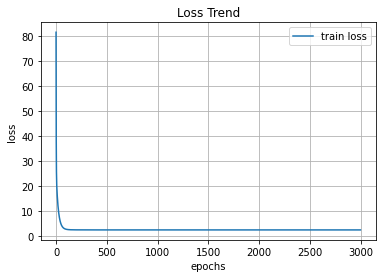

In [21]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.legend(loc='best')
plt.show()